In [108]:
!pip3 install networkx

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 1.8MB 317kB/s ta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/markus/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx


In [112]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
from sqlalchemy import Column, Integer, String, Float, DateTime, Boolean, func
from iotfunctions import base
from iotfunctions import bif
from iotfunctions.metadata import EntityType
from iotfunctions.db import Database
from iotfunctions.enginelog import EngineLogging
from iotfunctions import estimator
import datetime as dt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import pprint as pprint
import json
import networkx as nx

In [11]:
credentials = {
  "tenantId": "AnalyticsServiceDev",
  "as_api_host": "https://api-dev.connectedproducts.internetofthings.ibmcloud.com",
  "as_api_key": "a-69xgm4-8bdgtvnsv4",
  "as_api_token": "9X_tMKdupOiJ!mzaPV",
  "db2": {
    "username": "bluadmin",
    "password": "ZmM5MmE5NmZkZGZl",
    "databaseName": "BLUDB",
    "port": 50000,
    "httpsUrl": "https://dashdb-enterprise-yp-dal13-74.services.dal.bluemix.net:50000",
    "host": "dashdb-enterprise-yp-dal13-74.services.dal.bluemix.net"
  }
}

In [12]:
db_schema = None
db = Database(credentials=credentials)

/home/markus/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [13]:
# load all entity types - similar to the explore tab on the dashboard
metadata = db.http_request(object_type='allEntityTypes', object_name='', request='GET', payload={},  object_name_2='')

/home/markus/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [33]:
pp = pprint.PrettyPrinter(depth = 3)
metadataJson = json.loads(metadata)
pp.pprint(metadataJson)

[{'archivedDate': None,
  'dataItemDto': [{...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...}],
  'description': None,
  'dimensionTableName': 'iot_champagne_fermentation_ctg',
  'entityTypeId': 42,
  'metricTableName': 'iot_champagne_fermentation',
  'metricTimestampColumn': 'rcv_timestamp_utc',
  'name': 'Champagne_Fermentation',
  'origin': None,
  'schemaName': 'BLUADMIN',
  'status': 'ACTIVE'},
 {'archivedDate': None,
  'dataItemDto': [{...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...}],
  'description': '\n'
                 '    This sample demostrates using AI to make recommen

  'dataItemDto': [{...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...}],
  'description': 'Sample entity type based on data commonly available for 

  'dataItemDto': [{...}, {...}, {...}, {...}, {...}],
  'description': None,
  'dimensionTableName': 'iot_bboyd-simulation-1_ctg',
  'entityTypeId': 2297,
  'metricTableName': 'iot_bboyd_simulation_1',
  'metricTimestampColumn': 'rcv_timestamp_utc',
  'name': 'bboyd-simulation-1',
  'origin': None,
  'schemaName': 'BLUADMIN',
  'status': 'ACTIVE'},
 {'archivedDate': None,
  'dataItemDto': [{...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},
                  {...},


In [40]:
# get my entity type
et = db.http_request(object_type='entityType', object_name='Markus_Test_Robot1', request='GET', payload={},  object_name_2='')

/home/markus/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [41]:
# explore my data
etJson = json.loads(et)
pp.pprint(etJson)

{'archivedDate': None,
 'dataItemDto': [{'columnName': 'shift_day',
                  'columnType': 'TIMESTAMP',
                  'kpiFunctionId': 22853,
                  'name': 'shift_day',
                  'parentDataItemName': None,
                  'sourceTableName': 'dm_markus_test_robot1',
                  'tags': [...],
                  'transient': False,
                  'type': 'DERIVED_METRIC'},
                 {'columnName': 'firmware',
                  'columnType': 'LITERAL',
                  'kpiFunctionId': None,
                  'name': 'firmware',
                  'parentDataItemName': None,
                  'sourceTableName': None,
                  'tags': [],
                  'transient': False,
                  'type': 'DIMENSION'},
                 {'columnName': 'completed_movement_count',
                  'columnType': 'NUMBER',
                  'kpiFunctionId': 22856,
                  'name': 'completed_movement_count',
                  'pa

                  'name': 'work_performed',
                  'parentDataItemName': None,
                  'sourceTableName': 'dm_markus_test_robot1',
                  'tags': [...],
                  'transient': False,
                  'type': 'DERIVED_METRIC'},
                 {'columnName': 'entitydatagenerator',
                  'columnType': 'BOOLEAN',
                  'kpiFunctionId': 22851,
                  'name': 'entitydatagenerator',
                  'parentDataItemName': None,
                  'sourceTableName': 'dm_markus_test_robot1',
                  'tags': [...],
                  'transient': False,
                  'type': 'DERIVED_METRIC'},
                 {'columnName': 'load',
                  'columnType': 'NUMBER',
                  'kpiFunctionId': None,
                  'name': 'load',
                  'parentDataItemName': None,
                  'sourceTableName': None,
                  'tags': [],
                  'transient': False,
     

In [110]:
engineInput = db.http_request(object_type='engineInput', object_name='Markus_Test_Robot1', request='GET', payload={},  object_name_2='')

/home/markus/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [111]:
engineInputJson = json.loads(engineInput)
pp._depth = 5
pp.pprint(engineInputJson)

{'dataItems': [{'columnName': 'MM_MEAN',
                'columnType': 'NUMBER',
                'kpiFunctionDto': {'backtrack': None,
                                   'description': 'Create aggregation using '
                                                  'expression on a data item.',
                                   'enabled': True,
                                   'execStatus': False,
                                   'functionName': 'AggregateWithCalculation',
                                   'granularity': 'Daily',
                                   'input': {'expression': '${GROUP}.mean()',
                                             'source': 'speed'},
                                   'inputMeta': None,
                                   'kpiFunctionId': 24203,
                                   'name': 'dbc9dc79-9dfe-461e-81fa-33aba1439c01',
                                   'output': {'name': 'MM_mean'},
                                   'outputMeta': {'MM_me

                      'name': '3df6a018-bbc0-4b40-8692-73921cb4d676',
                      'output': {'output_name': 'work_performed'},
                      'outputMeta': {},
                      'schedule': None},
                     {'backtrack': None,
                      'description': '\n'
                                     '    Generate random discrete numeric '
                                     'values.\n'
                                     '    ',
                      'enabled': True,
                      'execStatus': False,
                      'functionName': 'RandomDiscreteNumeric',
                      'granularity': None,
                      'input': {'discrete_values': [0, 1, 2, 4, 5],
                                'probabilities': [0.7999999999999998,
                                                  0.04999999999999999,
                                                  0.04999999999999999,
                                                  0.04999999

/home/markus/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/markus/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


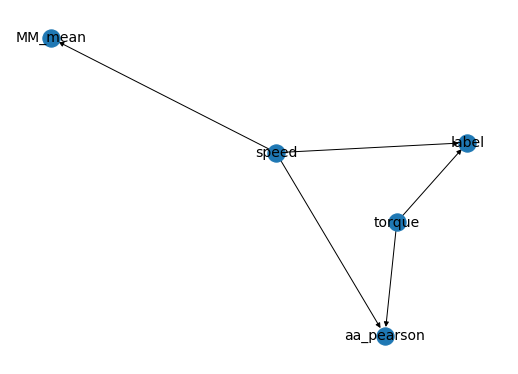

In [128]:
dataItems = engineInputJson['dataItems']

G=nx.DiGraph()

# get rid of unneeded stuff an fill dictionary
for el in dataItems:
    if el['type'] not in ('METRIC', 'DERIVED_METRIC'):
        continue
    
    G.add_node(el.get('name'))
    kpiFctDto = el['kpiFunctionDto']
    if kpiFctDto != None and not isinstance(kpiFctDto, str):
        kpiInput = kpiFctDto['input']
        for kpiInputEl in kpiInput:
            attr = kpiInput.get(kpiInputEl)
            #print (kpiInputEl, attr)
            if isinstance(attr, str):
                for el2 in dataItems:
                    if (el2.get('name') == attr):
                        G.add_edge(el2.get('name'), el.get('name'))
            
# remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

#pp.pprint(engineInputJson['dataItems'])
plt.figure(figsize=(7,5))
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, font_size=14)
#for p in pos:  # raise text positions
#    pos[p][1] += 0.07
#nx.draw_networkx_labels(G, pos)
plt.show()